# **TIME SERIES ANALYSIS 📈 ARIMA, PROPHET, ADF, PACF**

# **BUSINESS PROBLEM**

Features:

    - Date: TimeSeries
    - Rainfall_Bastia_Umbra: indicates the quantity of rain falling Bastia Umbra (mm)
    - Temperature_Bastia_Umbra: indicates the temperature Bastia Umbra (°C)
    - Temperature_Petrignano: indicates the temperature Petrignano (°C)
    - Volume indicates the volume of water taken from the drinking water treatment plant (m 3 )
    - Hydrometry indicates the groundwater level (m)

Target:

    - Depth_to_Groundwater_P24: indicates the groundwater level (m from the ground floor)
    - Depth_to_Groundwater_P25: indicates the groundwater level (m from the ground floor)

In [248]:
import numpy as np 
import pandas as pd 
import warnings
warnings.simplefilter('ignore')

In [249]:
path = './dataset/Aquifer_Petrignano.csv'
df = pd.read_csv(path)
line = '='*30

In [250]:
def data_statistics(data):
    print('NUMERIC FEATURES')
    display(data.describe([0.05,0.25,0.75,0.95]).T)
    if('object' in data.dtypes.to_list()):
        print('CATEGORICAL FEATURES')
        display(data.describe(include='object').T)

def data_profile(data):
    count_of_duplicate = len(data[data.duplicated()])
    data_size = round(data.memory_usage(deep=True).sum()/1000000, 2)
    data_dimension = data.shape
    dtype = data.dtypes
    count_of_null = data.isna().sum()
    null_ratio = round(count_of_null/len(data), 2)
    count_of_distinct = data.nunique()
    distinct_value = data.apply(lambda x: x.unique())
    output = pd.DataFrame(list(zip(dtype, count_of_null, null_ratio, count_of_distinct, distinct_value)),
                          index=data.columns,
                          columns=['dtype','count_of_null','null_ratio','count_of_distinct','distinct_value'])
    print(f'Dimensions\t: {data_dimension}')
    print(f'Data Size\t: {data_size} MB')
    if count_of_duplicate == 0:
        print(f'Duplicated Data\t: {count_of_duplicate}')
    else:
        print(line)
        print(f'Duplicated Data\t: {count_of_duplicate}')
        display(data[data.duplicated()])
    print(line)
    print('SUMMARY')
    display(output)

In [251]:
data_profile(df)
data_statistics(df)
display(df.head())

Dimensions	: (5223, 8)
Data Size	: 0.64 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,object,0,0.00,5223,"[14/03/2006, 15/03/2006, 16/03/2006, 17/03/200..."
Rainfall_Bastia_Umbra,float64,1024,0.20,223,"[nan, 0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, ..."
Depth_to_Groundwater_P24,float64,55,0.01,1306,"[-22.48, -22.38, -22.25, -22.6, -22.35, -22.5,..."
Depth_to_Groundwater_P25,float64,39,0.01,1298,"[-22.18, -22.14, -22.04, -21.95, -21.99, -21.8..."
Temperature_Bastia_Umbra,float64,1024,0.20,336,"[nan, 5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3..."
Temperature_Petrignano,float64,1024,0.20,320,"[nan, 4.9, 2.5, 3.9, 0.8, -2.1, -0.7, -0.3, 6...."
Volume_C10_Petrignano,float64,198,0.04,4324,"[nan, -29281.824, -29245.536, -29355.264, -301..."
Hydrometry_Fiume_Chiascio_Petrignano,float64,1024,0.20,25,"[nan, 2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, ..."


NUMERIC FEATURES


,count,mean,std,min,5%,25%,50%,75%,95%,max
Rainfall_Bastia_Umbra,4199.0,1.556633,5.217923,0.000,0.0000,0.00,0.00,0.10,10.400,67.30
Depth_to_Groundwater_P24,5168.0,-26.263723,3.319858,-34.470,-32.7765,-28.25,-25.99,-23.82,-21.170,-19.66
Depth_to_Groundwater_P25,5184.0,-25.692926,3.214165,-33.710,-31.8600,-27.62,-25.54,-23.43,-20.660,-19.10
Temperature_Bastia_Umbra,4199.0,15.030293,7.794871,-3.700,2.8000,8.80,14.70,21.40,27.600,33.00
Temperature_Petrignano,4199.0,13.739081,7.701369,-4.200,0.9000,7.70,13.50,20.00,26.200,31.10
Volume_C10_Petrignano,5025.0,-29043.296726,4751.864371,-45544.896,-36826.2720,-31678.56,-28689.12,-26218.08,-22976.352,0.00
Hydrometry_Fiume_Chiascio_Petrignano,4199.0,2.372517,0.589088,0.000,1.9000,2.10,2.40,2.70,3.100,4.10


CATEGORICAL FEATURES


,count,unique,top,freq
Date,5223,5223,14/03/2006,1


,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN


# **DATA CLEANSING**

In [252]:
# remove rows in column Rainfall_Bastia_Umbra is null
df_clean = df.copy()
# df_clean = df.dropna(subset='Rainfall_Bastia_Umbra').reset_index(drop=True)   # same value
df_clean = df[df.Rainfall_Bastia_Umbra.notnull()].reset_index(drop=True)        # same value

# remove not usefull columns
df_clean.drop(['Depth_to_Groundwater_P24', 'Temperature_Petrignano'], axis=1, inplace=True)

# simplify columns names
columns = ['Date','Rainfall','Depth','Temperature','DrainageVolume','Hydrometry']
target = ['Depth']
features = [i for i in columns if i not in target]
df_clean.columns = columns

In [253]:
data_profile(df_clean)
df_clean

Dimensions	: (4199, 6)
Data Size	: 0.45 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,object,0,0.00,4199,"[01/01/2009, 02/01/2009, 03/01/2009, 04/01/200..."
Rainfall,float64,0,0.00,223,"[0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, 2.8, ..."
Depth,float64,27,0.01,1142,"[-31.14, -31.11, -31.07, -31.05, -31.01, -31.0..."
Temperature,float64,0,0.00,336,"[5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3, 4.9..."
DrainageVolume,float64,1,0.00,3669,"[-24530.688, -28785.888, -25766.208, -27919.29..."
Hydrometry,float64,0,0.00,25,"[2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, 2.1, ..."


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry
0,01/01/2009,0.0,-31.14,5.2,-24530.688,2.4
1,02/01/2009,0.0,-31.11,2.3,-28785.888,2.5
2,03/01/2009,0.0,-31.07,4.4,-25766.208,2.4
3,04/01/2009,0.0,-31.05,0.8,-27919.296,2.4
4,05/01/2009,0.0,-31.01,-1.9,-29854.656,2.3
...,...,...,...,...,...,...
4194,26/06/2020,0.0,-25.07,25.7,-29930.688,2.5
4195,27/06/2020,0.0,-25.11,26.2,-31332.960,2.4
4196,28/06/2020,0.0,-25.19,26.9,-32120.928,2.4
4197,29/06/2020,0.0,-25.18,26.9,-30602.880,2.4


## **Check Chronological Order and Equidistant Timestamps**
The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.


In [254]:
# from datetime import datetime

df_clean1 = df_clean.copy()
#convert date typedata to date
df_clean1['Date'] = pd.to_datetime(df_clean1.Date, format='%d/%m/%Y')
df_clean1 = df_clean1.sort_values('Date').reset_index(drop=True)

df_clean1['DeltaDiff'] = df_clean1.Date - df_clean1.Date.shift(1) 

print(df_clean1.DeltaDiff.sum(), df_clean1.DeltaDiff.count()) # Check Constant interval
display(df_clean1)
df_clean1.drop(['DeltaDiff'], axis=1, inplace=True)
data_profile(df_clean1)

4198 days 00:00:00 4198


,Date,Rainfall,Depth,Temperature,DrainageVolume,Hydrometry,DeltaDiff
0,2009-01-01,0.0,-31.14,5.2,-24530.688,2.4,NaT
1,2009-01-02,0.0,-31.11,2.3,-28785.888,2.5,1 days
2,2009-01-03,0.0,-31.07,4.4,-25766.208,2.4,1 days
3,2009-01-04,0.0,-31.05,0.8,-27919.296,2.4,1 days
4,2009-01-05,0.0,-31.01,-1.9,-29854.656,2.3,1 days
...,...,...,...,...,...,...,...
4194,2020-06-26,0.0,-25.07,25.7,-29930.688,2.5,1 days
4195,2020-06-27,0.0,-25.11,26.2,-31332.960,2.4,1 days
4196,2020-06-28,0.0,-25.19,26.9,-32120.928,2.4,1 days
4197,2020-06-29,0.0,-25.18,26.9,-30602.880,2.4,1 days


Dimensions	: (4199, 6)
Data Size	: 0.2 MB
Duplicated Data	: 0
SUMMARY


,dtype,count_of_null,null_ratio,count_of_distinct,distinct_value
Date,datetime64[ns],0,0.00,4199,"[2009-01-01T00:00:00.000000000, 2009-01-02T00:..."
Rainfall,float64,0,0.00,223,"[0.0, 0.9, 1.1, 0.1, 4.1, 2.9, 7.0, 0.4, 2.8, ..."
Depth,float64,27,0.01,1142,"[-31.14, -31.11, -31.07, -31.05, -31.01, -31.0..."
Temperature,float64,0,0.00,336,"[5.2, 2.3, 4.4, 0.8, -1.9, -0.7, 1.5, 4.3, 4.9..."
DrainageVolume,float64,1,0.00,3669,"[-24530.688, -28785.888, -25766.208, -27919.29..."
Hydrometry,float64,0,0.00,25,"[2.4, 2.5, 2.3, 2.6, 2.7, 2.8, 2.9, 2.2, 2.1, ..."


## **Handle Missing Values**

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

sns.set_context('notebook')
sns.set_palette('cool')
sns.set(rc={
    'figure.figsize':(16,5)
})

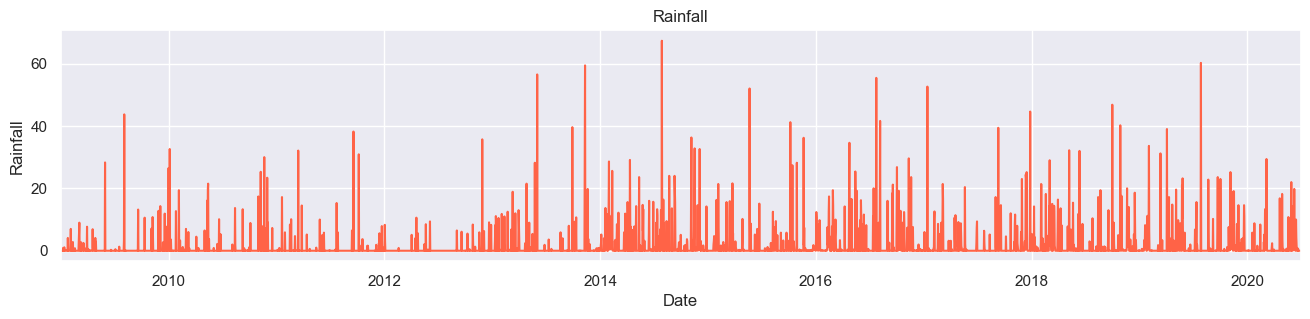

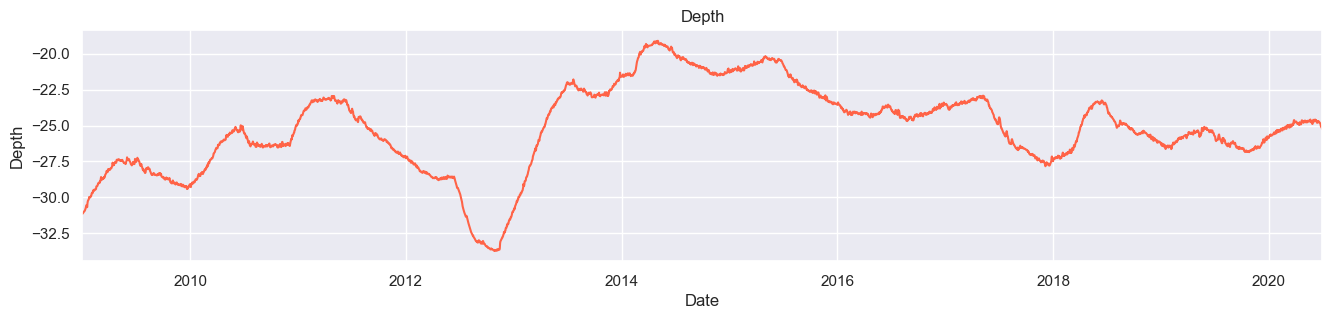

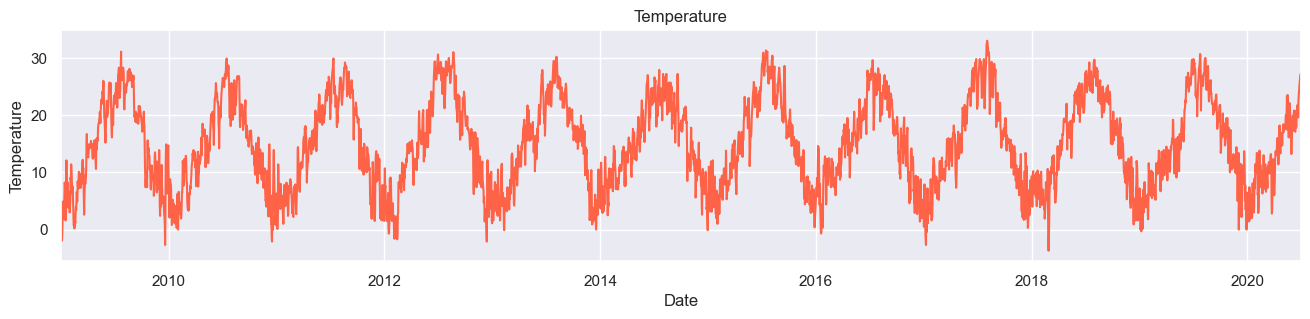

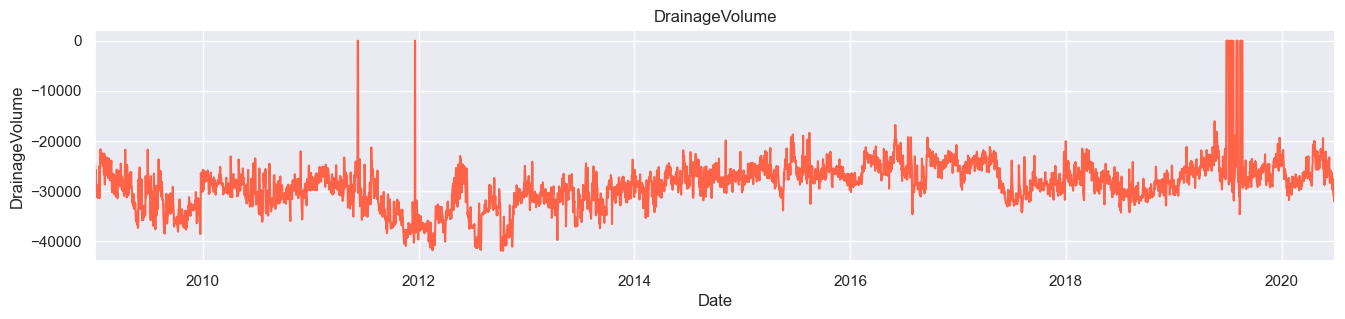

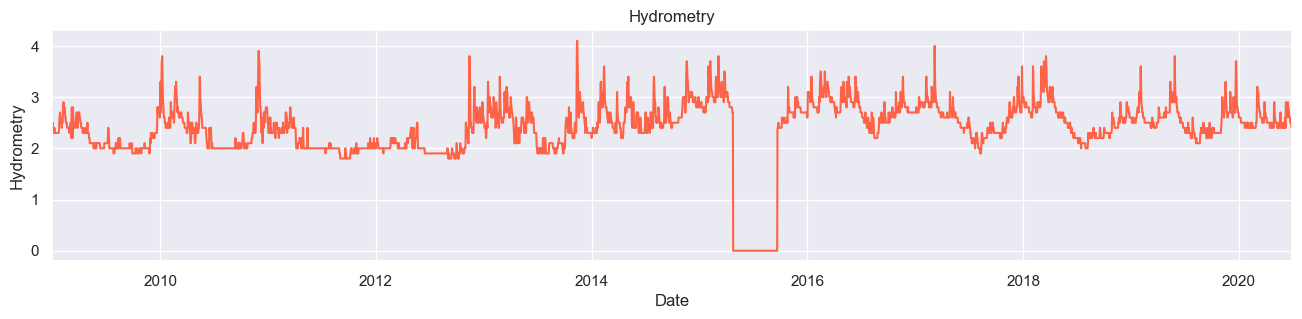

In [256]:
for index, feature in enumerate([i for i in df_clean1.columns if i not in ['Date']]):
    f, ax = plt.subplots(figsize=(16,3))
    sns.lineplot(x=df_clean1.Date, y=df_clean1[feature], color='tomato').set(
        title=feature,
        xlim=[df_clean1.Date.min(), df_clean1.Date.max()])


As we can see, the dataset has some null values DrainageVolume, and Depth. For zero values in DrainageVolume, and Hydrometry is disgusting. So we have to fix missing values and zero values in DrainageVolume and Hydrometry. Lets take a look of these cases and explore what can we do with them.

Handle Missing Values for Time Series:

    - bfill or ffill
    - interpolation

[(16314.0, 16953.0)]

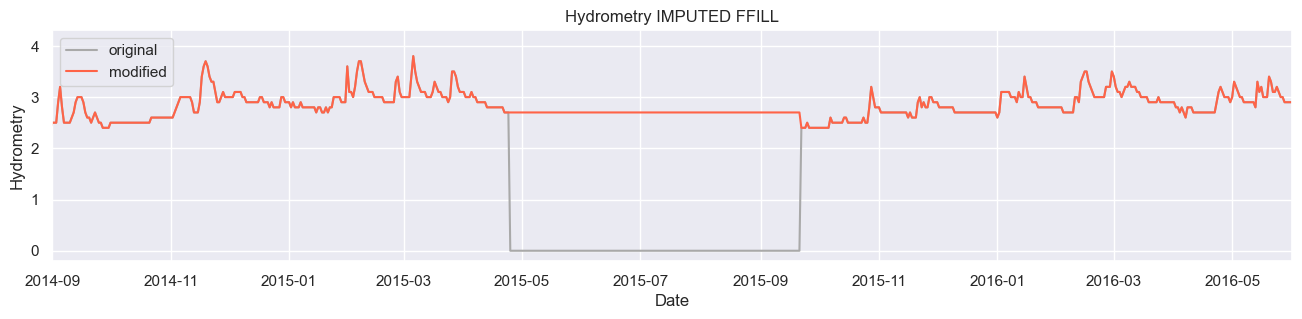

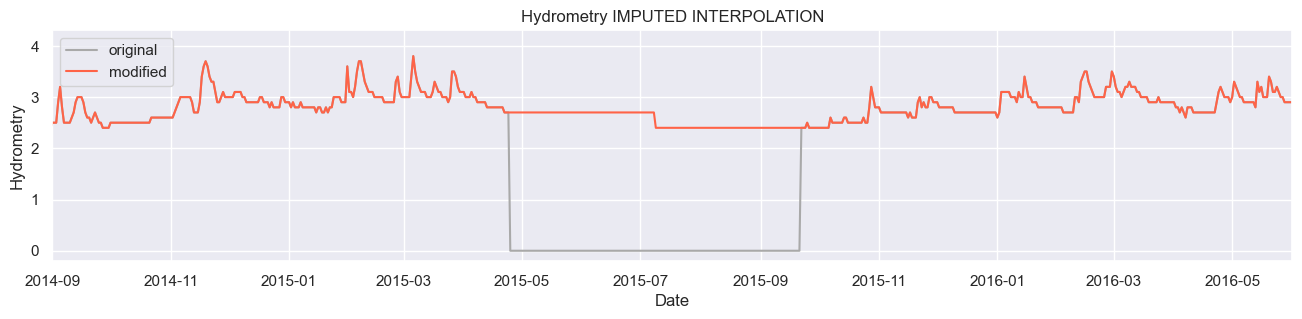

In [257]:
from datetime import date

df_clean2 = df_clean1.copy()
df_clean2.Hydrometry.replace(0, np.nan, inplace=True)

f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.Hydrometry, color='darkgray', label='original').set(
    title='Hydrometry IMPUTED FFILL',
    xlim=[date(2014,9,1), date(2016,6,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry.fillna(method='ffill'), color='tomato', label='modified').set(
    xlim=[date(2014,9,1), date(2016,6,1)])
f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.Hydrometry, color='darkgray', label='original').set(
    title='Hydrometry IMPUTED INTERPOLATION',
    xlim=[date(2014,9,1), date(2016,6,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.Hydrometry.interpolate(method='nearest'), color='tomato', label='modified').set(
    xlim=[date(2014,9,1), date(2016,6,1)])

[(18017.0, 18170.0)]

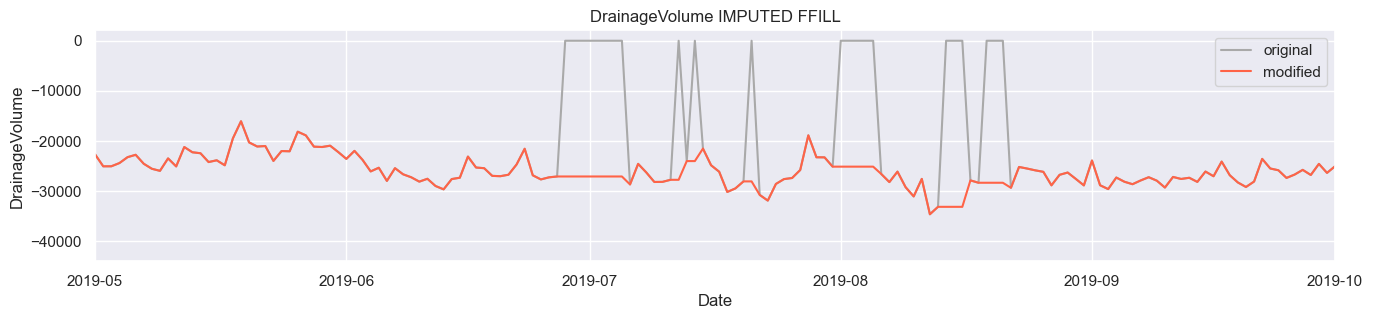

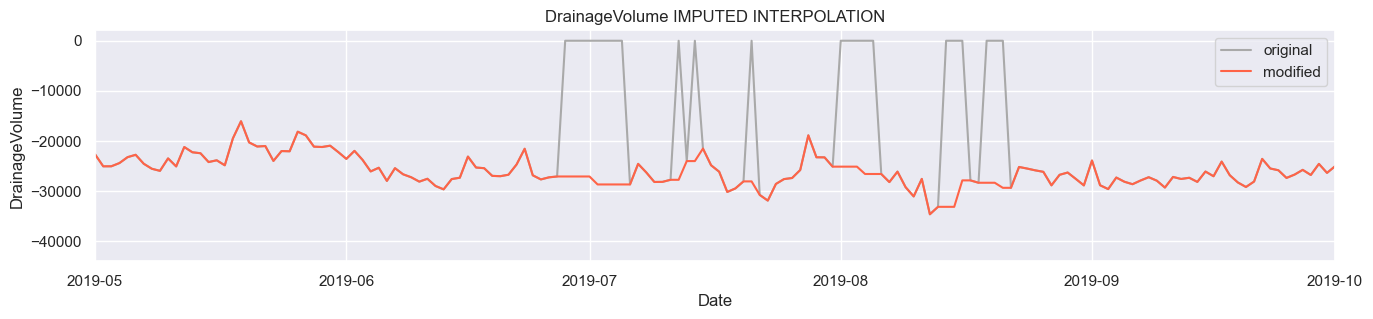

In [258]:
df_clean2.DrainageVolume.replace(0, np.nan, inplace=True)

f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.DrainageVolume, color='darkgray', label='original').set(
    title='DrainageVolume IMPUTED FFILL',
    xlim=[date(2019,5,1), date(2019,10,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume.fillna(method='ffill'), color='tomato', label='modified').set(
    xlim=[date(2019,5,1), date(2019,10,1)])
f, ax = plt.subplots(figsize=(16,3))
sns.lineplot(x=df_clean1.Date, y=df_clean1.DrainageVolume, color='darkgray', label='original').set(
    title='DrainageVolume IMPUTED INTERPOLATION',
    xlim=[date(2019,5,1), date(2019,10,1)])
sns.lineplot(x=df_clean2.Date, y=df_clean2.DrainageVolume.interpolate(method='nearest'), color='tomato', label='modified').set(
    xlim=[date(2019,5,1), date(2019,10,1)])

As we can see, the best option in this case, seems to best option!

So, lets interpolation missing values

In [259]:
df_clean2.DrainageVolume.interpolate(method='nearest', inplace=True)
df_clean2.Depth.interpolate(method='nearest', inplace=True)
df_clean2.Hydrometry.interpolate(method='cubicspline', inplace=True)

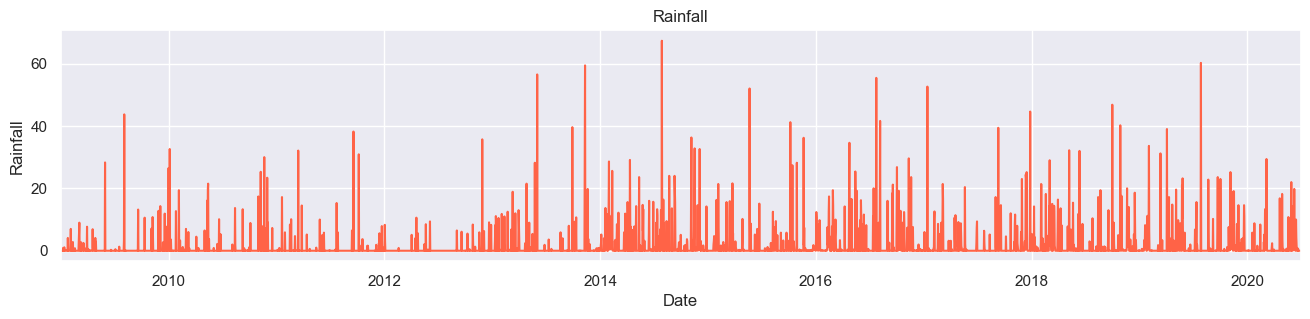

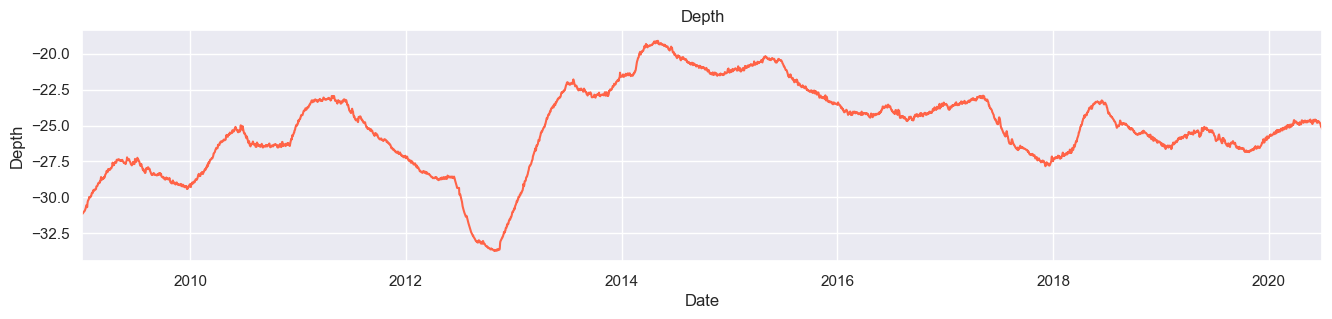

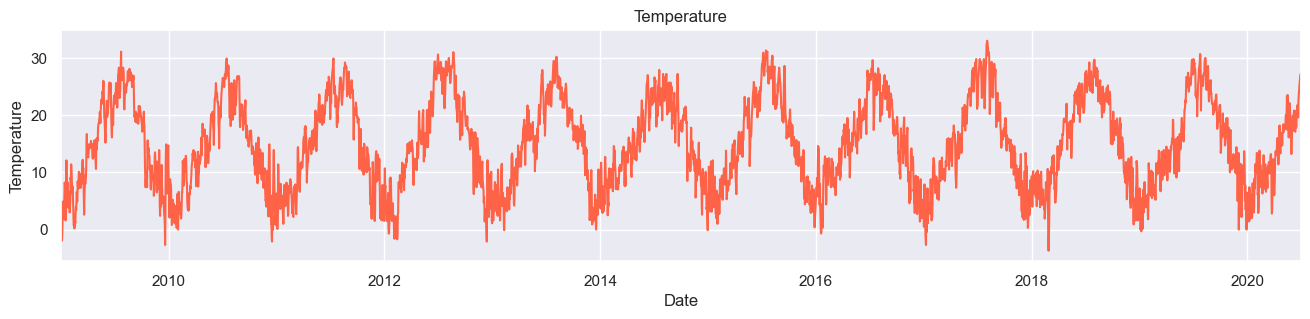

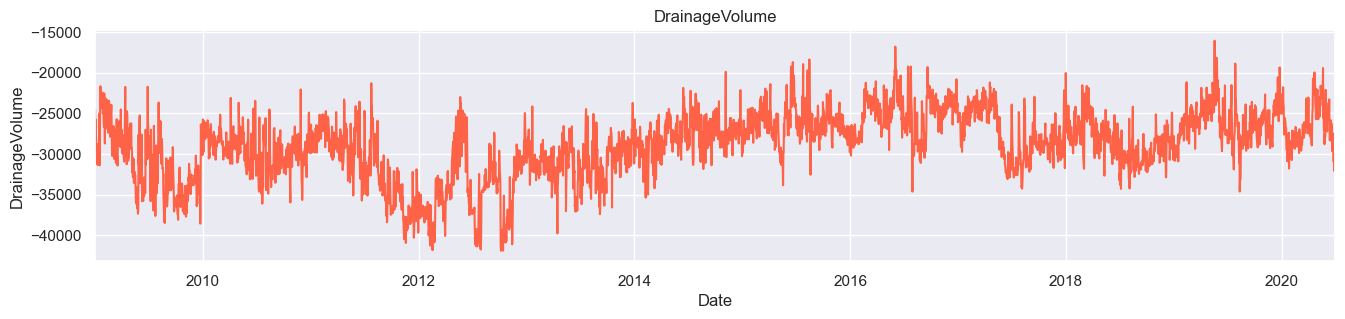

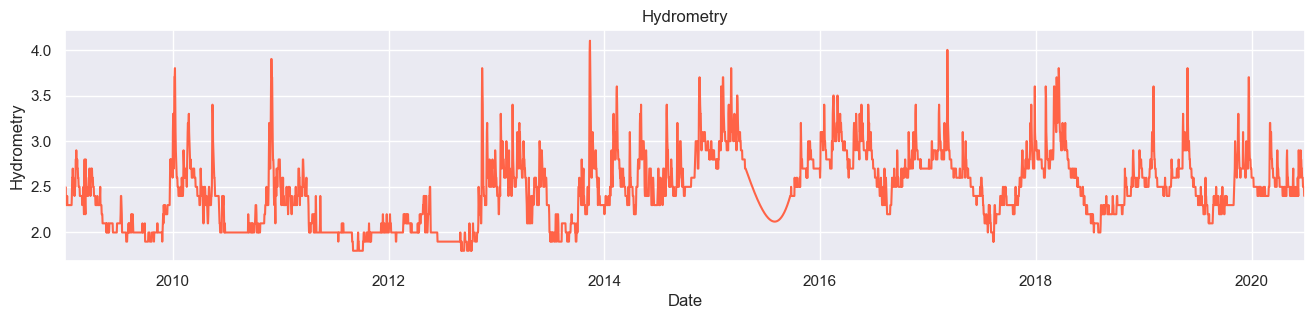

In [260]:
for index, feature in enumerate([i for i in df_clean2.columns if i not in ['Date']]):
    f, ax = plt.subplots(figsize=(16,3))
    sns.lineplot(x=df_clean2.Date, y=df_clean2[feature], color='tomato').set(
        title=feature,
        xlim=[df_clean2.Date.min(), df_clean2.Date.max()])